The optimal k value is determined without GridSearchCV: 13


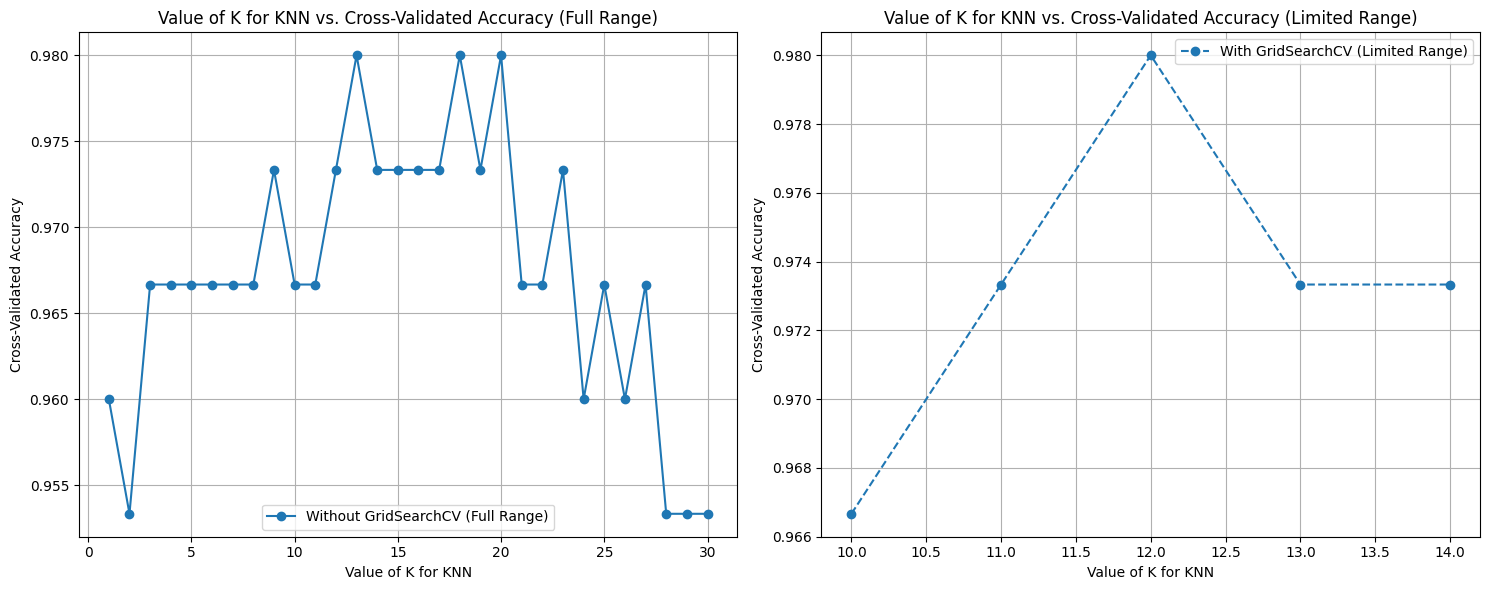

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris.data
y = iris.target

k_range_full = range(1, 31)

cv_scores_full = []

for k in k_range_full:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)
    cv_scores_full.append(scores.mean())

optimal_k_full = k_range_full[np.argmax(cv_scores_full)]
print(f"The optimal k value is determined without GridSearchCV: {optimal_k_full}")

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range_full, cv_scores_full, marker='o', label='Without GridSearchCV (Full Range)')
plt.title('Value of K for KNN vs. Cross-Validated Accuracy (Full Range)')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.grid(True)

param_grid = {'n_neighbors': k_range_full}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X, y)

grid_scores = grid_search.cv_results_['mean_test_score']

plt.subplot(1, 2, 2)
limited_range_indices = range(10, 15)
plt.plot(list(limited_range_indices), grid_scores[limited_range_indices], marker='o', linestyle='--', label='With GridSearchCV (Limited Range)')
plt.title('Value of K for KNN vs. Cross-Validated Accuracy (Limited Range)')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
